In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import func
import seaborn as sns
import plots

from func import ThreeD1, RMSE
from sklearn.metrics import accuracy_score
from statistics import mode
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#from sklearn.model_selection import cross_val_score
pd.set_option("display.max_rows", 100, "display.max_columns", 100) 

In [20]:
#df = pd.read_excel('cec_clay_susc.xlsx')[:56]
df = pd.read_excel('cec_clay_susc.xlsx')[:173]

df.describe()

,NUMBER,Duration,Depth,Klf_IP,Klf_QP,Ph_F1,Mass,#_y,Rg_F3,Khf_IP,Khf_QP,Ph_F3,Xlf_IP,Xhf_IP,Kfd_abs,Kfd,Xfd,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,Hg,Hg Error,Zn,Zn Error,W,W Error,Cu,...,Cd Error,Ag,Ag Error,Pd,Pd Error,Bal,Bal Error,Nb,Nb Error,Bi,Bi Error,Re,Re Error,Ta,Ta Error,Hf,Hf Error,Al,Al Error,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,Archaeology,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO
count,56.000000,56.000000,56.000000,173.000000,56.000000,56.000000,173.000000,56.000000,56.000000,173.000000,5.600000e+01,56.000000,173.000000,173.000000,173.000000,173.000000,173.000000,5.600000e+01,56.0,56.000000,56.0,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.0,56.0,56.0,56.0,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,173.000000,150.000000,56.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,65.000000
mean,128.500000,361.190357,84.607143,0.002907,0.000008,1.780714,10.413699,443.767857,3.035714,0.002644,5.588430e-07,1.749464,42.315114,37.835990,4.479124,10.023602,4.479124,8.147736e+05,0.0,3376.150357,0.0,104966.773571,0.0,5.670000,1.382143,336.833571,2.826607,87.617857,1.50750,0.0,2.999107,52.193750,1.420357,4.658571,1.296607,14.559643,2.105179,0.0,3.128036,0.0,1.689643,7.546607,2.072143,0.079464,4.018214,34.129643,3.471429,0.0,16.186429,9.710179,...,6.281964,0.738214,3.623214,0.646429,5.319286,506493.865714,1098.384464,7.329107,1.080357,3.212679,1.823750,0.0,1.5,0.0,1.5,0.0,1.5,55537.975536,1153.834286,230.206786,217.406964,380735.293571,1048.967857,5.42250,18.371250,1782.683929,1327.247143,6.855536,14.501250,0.796964,8.866429,0.0,19.163750,21.017857,0.242775,1.381900,84.357143,14.939364,2.978624,6.768439,10.065887,25.837597,11.050205,12.233698,23.283903,26.485640,24.392860,50.878500,0.576571,6.087692
std,129.429517,0.740427,60.721923,0.004023,0.000008,6.280166,3.703399,205.886022,0.187256,0.003618,1.932940e-06,3.690164,56.667546,50.688274,6.184501,6.084587,6.184501,1.395492e+05,0.0,2442.210344,0.0,37035.560062,0.0,2.773215,0.127089,155.551836,0.701866,55.872667,0.49634,0.0,0.540708,24.564462,0.355374,2.843824,0.144829,9.187658,0.338639,0.0,0.227104,0.0,0.131508,6.452734,0.359043,0.594656,0.350335,36.843258,0.763653,0.0,1.292301,9.846063,...,0.884304,1.539733,0.982307,1.894977,1.595178,27814.679966,74.493896,4.388561,0.185295,3.179280,0.326438,0.0,0.0,0.0,0.0,0.0,0.0,19595.534544,241.890321,468.180725,309.021511,65209.886639,56.098186,31.26507,2.523047,1683.146872,509.753206,14.302167,10.719625,3.467316,0.881541,0.0,1.076521,18.076093,0.430005,0.207847,60.796659,9.855823,1.978622,0.989544,6.634248,14.703730,6.588059,11.823587,16.553541,15.432102,17.038174,22.477296,0.762206,12.087746
min,1.000000,360.010000,4.000000,0.000003,-0.000002,-37.920000,5.830000,65.000000,3.000000,0.000001,-6.072000e-06,-0.790000,0.160813,0.080649,0.011962,1.869159,0.011962,4.877352e+05,0.0,0.000000,0.0,30473.500000,0.0,0.000000,1.090000,43.120000,1.190000,11.110000,0.69000,0.0,1.940000,9.580000,0.740000,0.000000,0.940000,2.330000,1.530000,0.0,2.740000,0.0,1.450000,0.000000,1.450000,0.000000,2.760000,0.000000,2.480000,0.0,14.000000,0.000000,...,3.250000,0.000000,1.740000,0.000000,1.800000,465954.720000,904.680000,0.000000,1.000000,0.000000,1.500000,0.0,1.

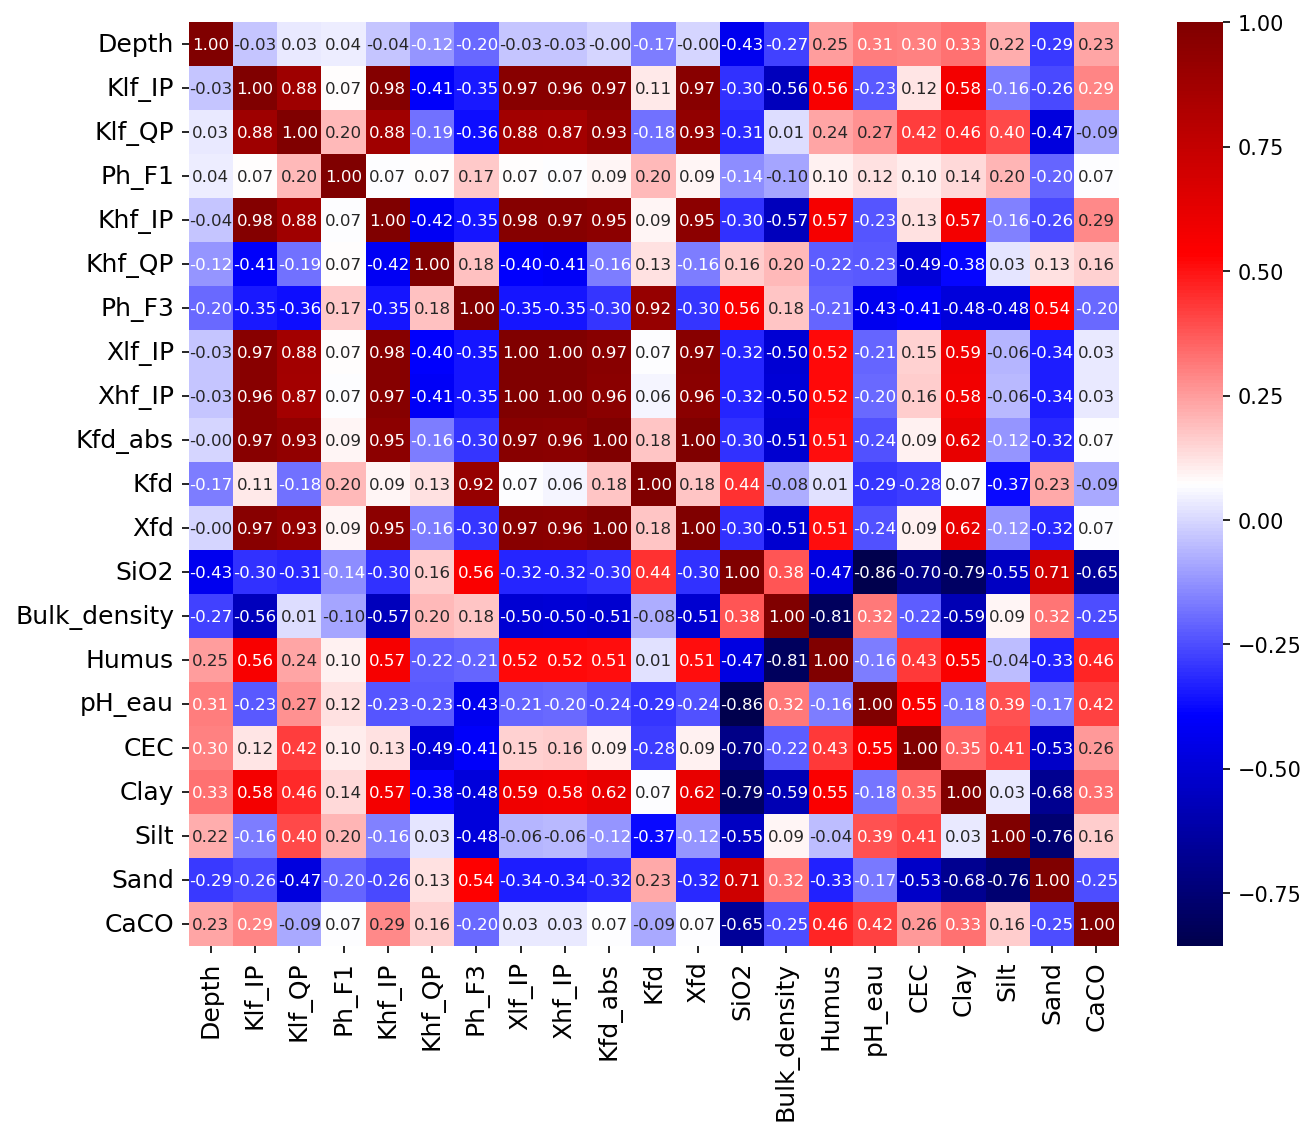

In [21]:
df_f = df[['Depth', 'Klf_IP', 'Klf_QP', 'Ph_F1', 'Khf_IP', 'Khf_QP', 'Ph_F3', 'Xlf_IP', 'Xhf_IP', 'Kfd_abs', 'Kfd', 'Xfd', 'SiO2', 'Bulk_density', 
           'Humus', 'pH_eau', 'CEC', 'Clay', 'Silt', 'Sand', 'CaCO']]

# Setting the figure size
plt.figure(figsize=(10, 8))

# Plotting correlation heatmap with annotations
dataplot = sns.heatmap(df_f.corr(), cmap="seismic", annot=True, fmt=".2f", annot_kws={"size": 8})

dataplot.tick_params(axis='both', which='major', labelsize=12)

# Rotating y-axis labels for better visualization
dataplot.set_yticklabels(dataplot.get_yticklabels(), rotation=0)

# Setting the label size for x and y axes
dataplot.set_xlabel(dataplot.get_xlabel(), fontsize=14)
dataplot.set_ylabel(dataplot.get_ylabel(), fontsize=14)

plt.show()

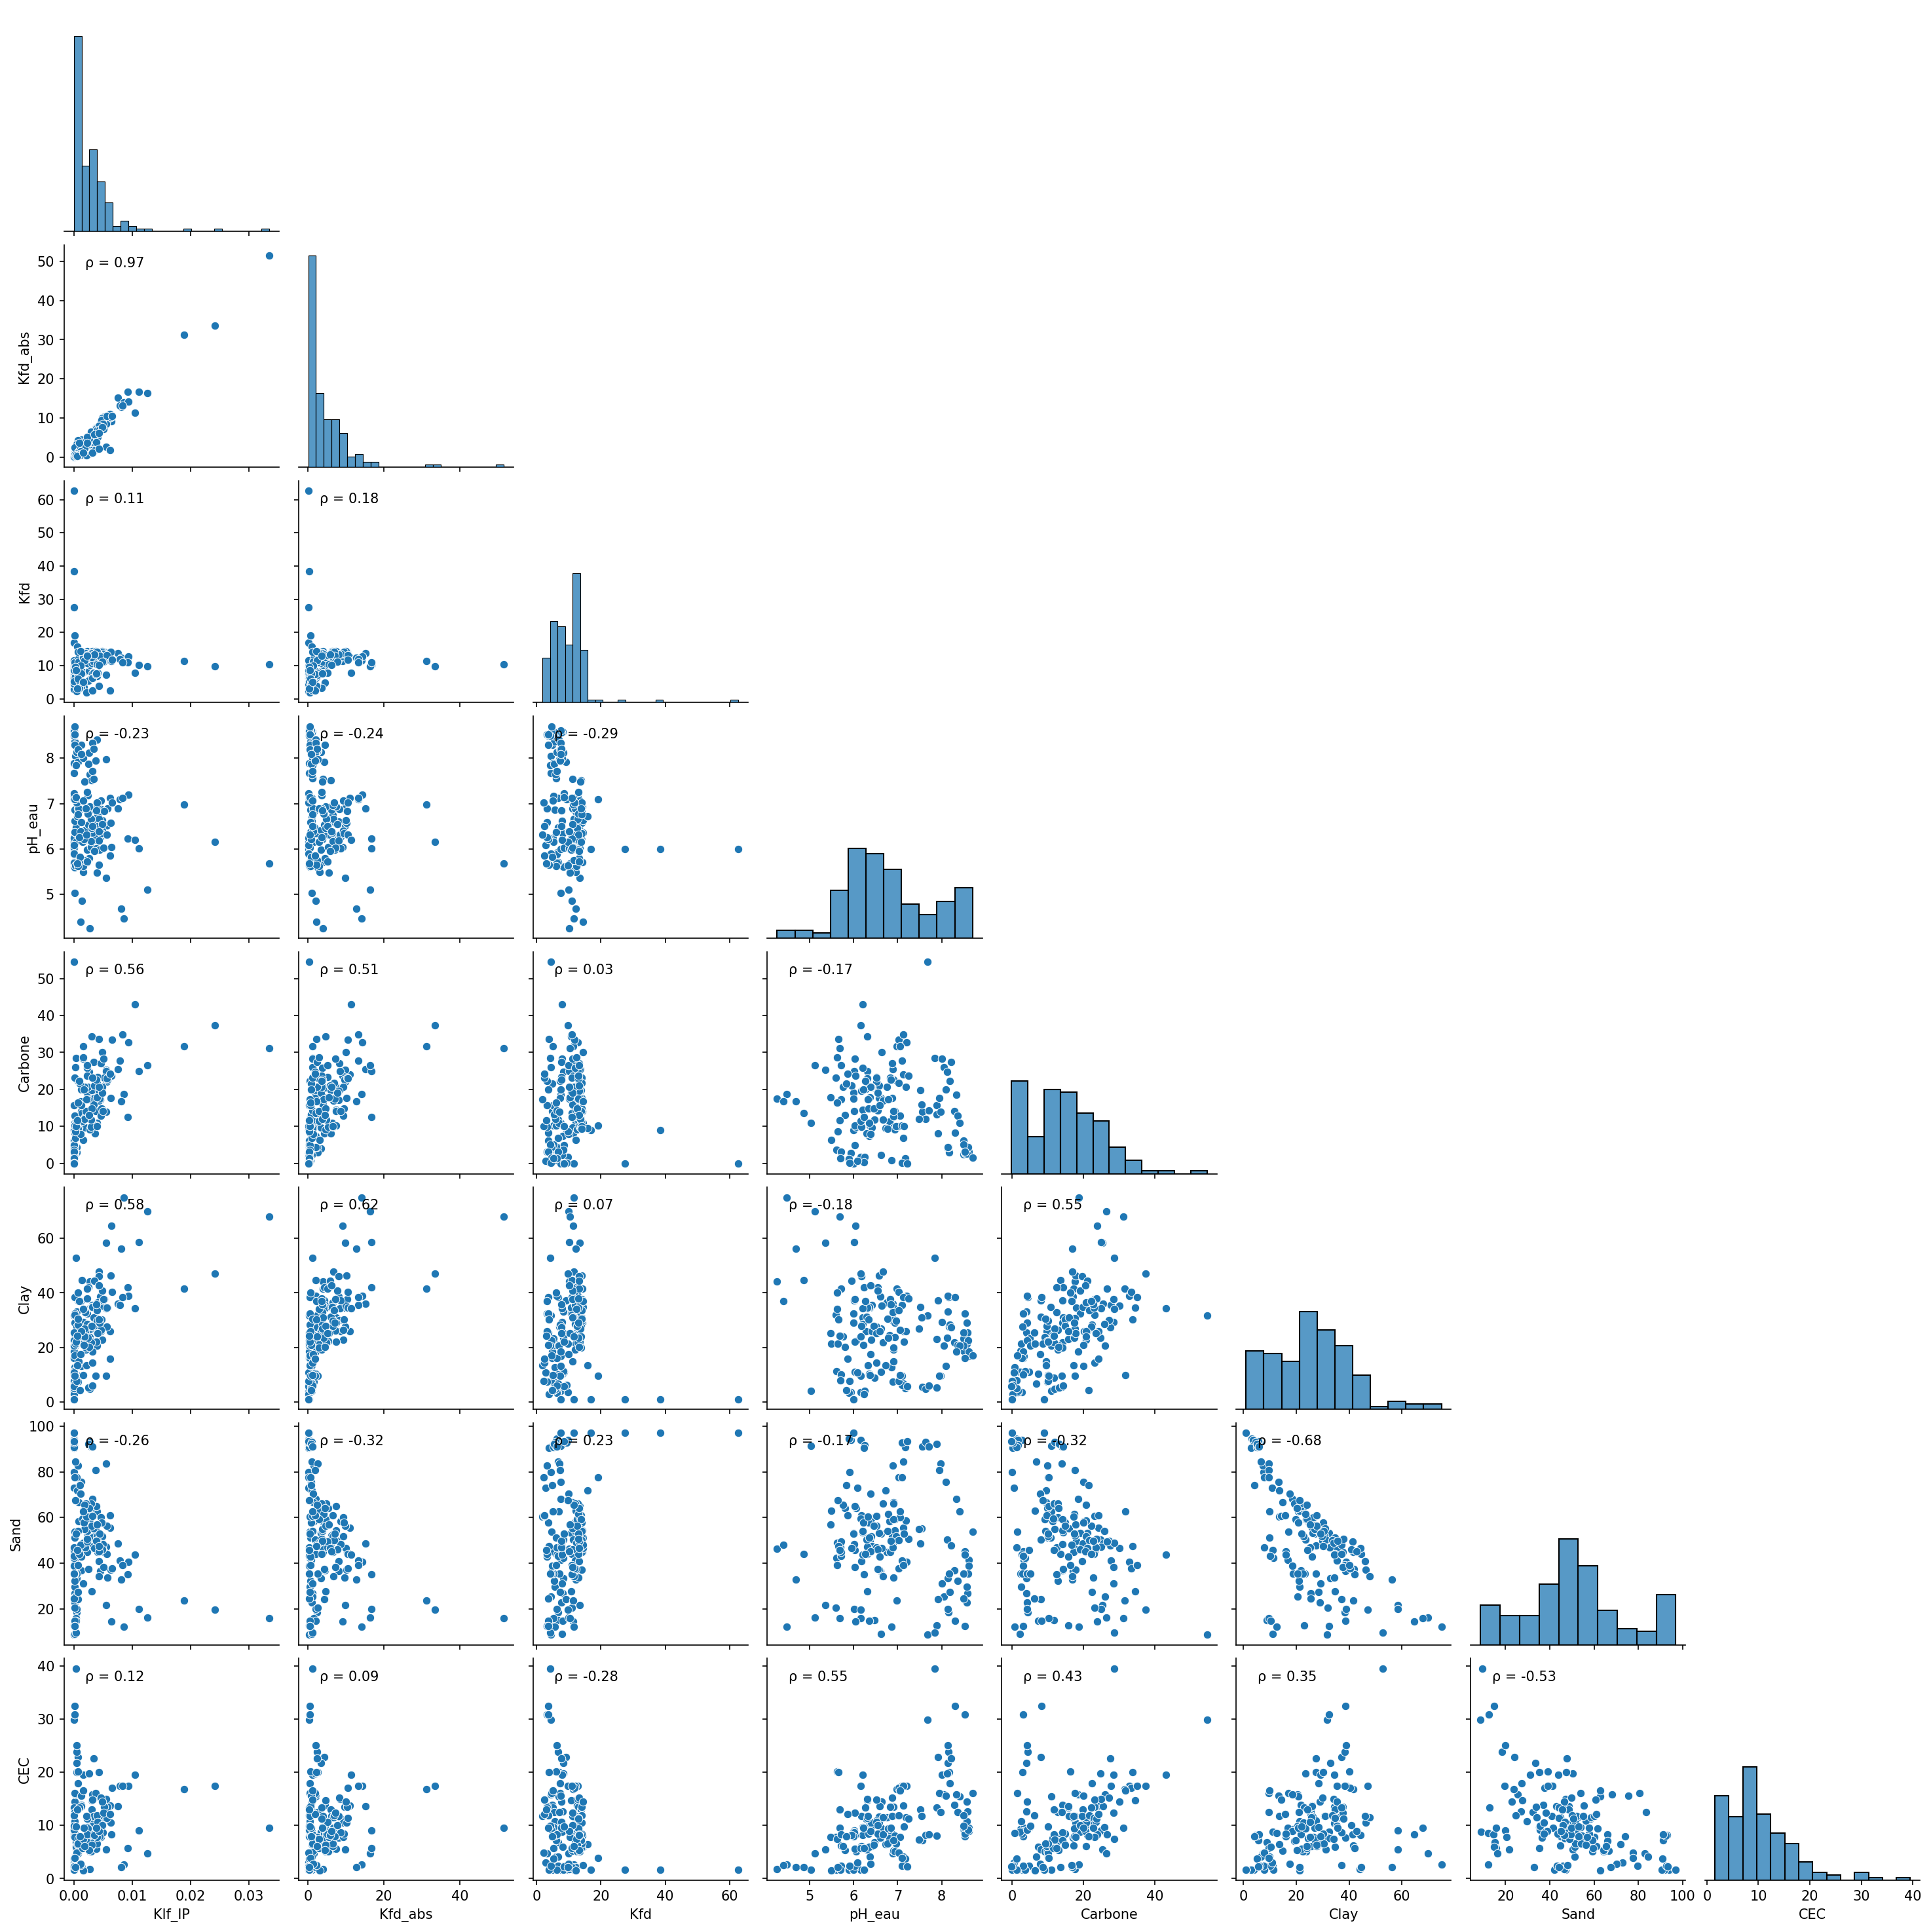

In [22]:
g = sns.pairplot(df.loc[:,['Klf_IP', 'Kfd_abs', 'Kfd', 'pH_eau', 'Carbone', 'Clay', 'Sand', 'CEC']], 
                  diag_kws=dict(fill=True), corner=True)

g.map_lower(func.corrfunc)
plt.show()

In [23]:
mapping = {
    "AN": ("black", "o"),
    "P": ("cornflowerblue", "o"),
    "S": ("orange", "o"),
    "Ea": ("blue", "o"),
    "Aa": ("navy", "o"),
    "HE": ("indianred", "o"),
    "L": ("bisque", "^"),
    "D": ("firebrick", "^"),
    "V": ("sandybrown", "^"),
    "HOEKE": ("teal", "^"),
    "EHBH": ("green", "^"),
}

# Function to plot data.
def plot_data(axis, x_col, y_col, include_label=False, aa=0.7, ss=60, lw=0):
    corr = round(np.corrcoef(x_col, y_col)[0][1], 2)
    for start_str, (color, marker) in mapping.items():
        mask = df['SAMPLE'].str.startswith(start_str)
        label = f"{start_str} Site" if include_label else None
        axis.text(x=0, y=np.max(y_col), s = f'Corr = {corr}' )
        axis.scatter(x_col[mask], y_col[mask], alpha=aa, s=ss, linewidth=lw, c=color, marker=marker, label=label)
        axis.set_ylim(0, np.max(y_col))

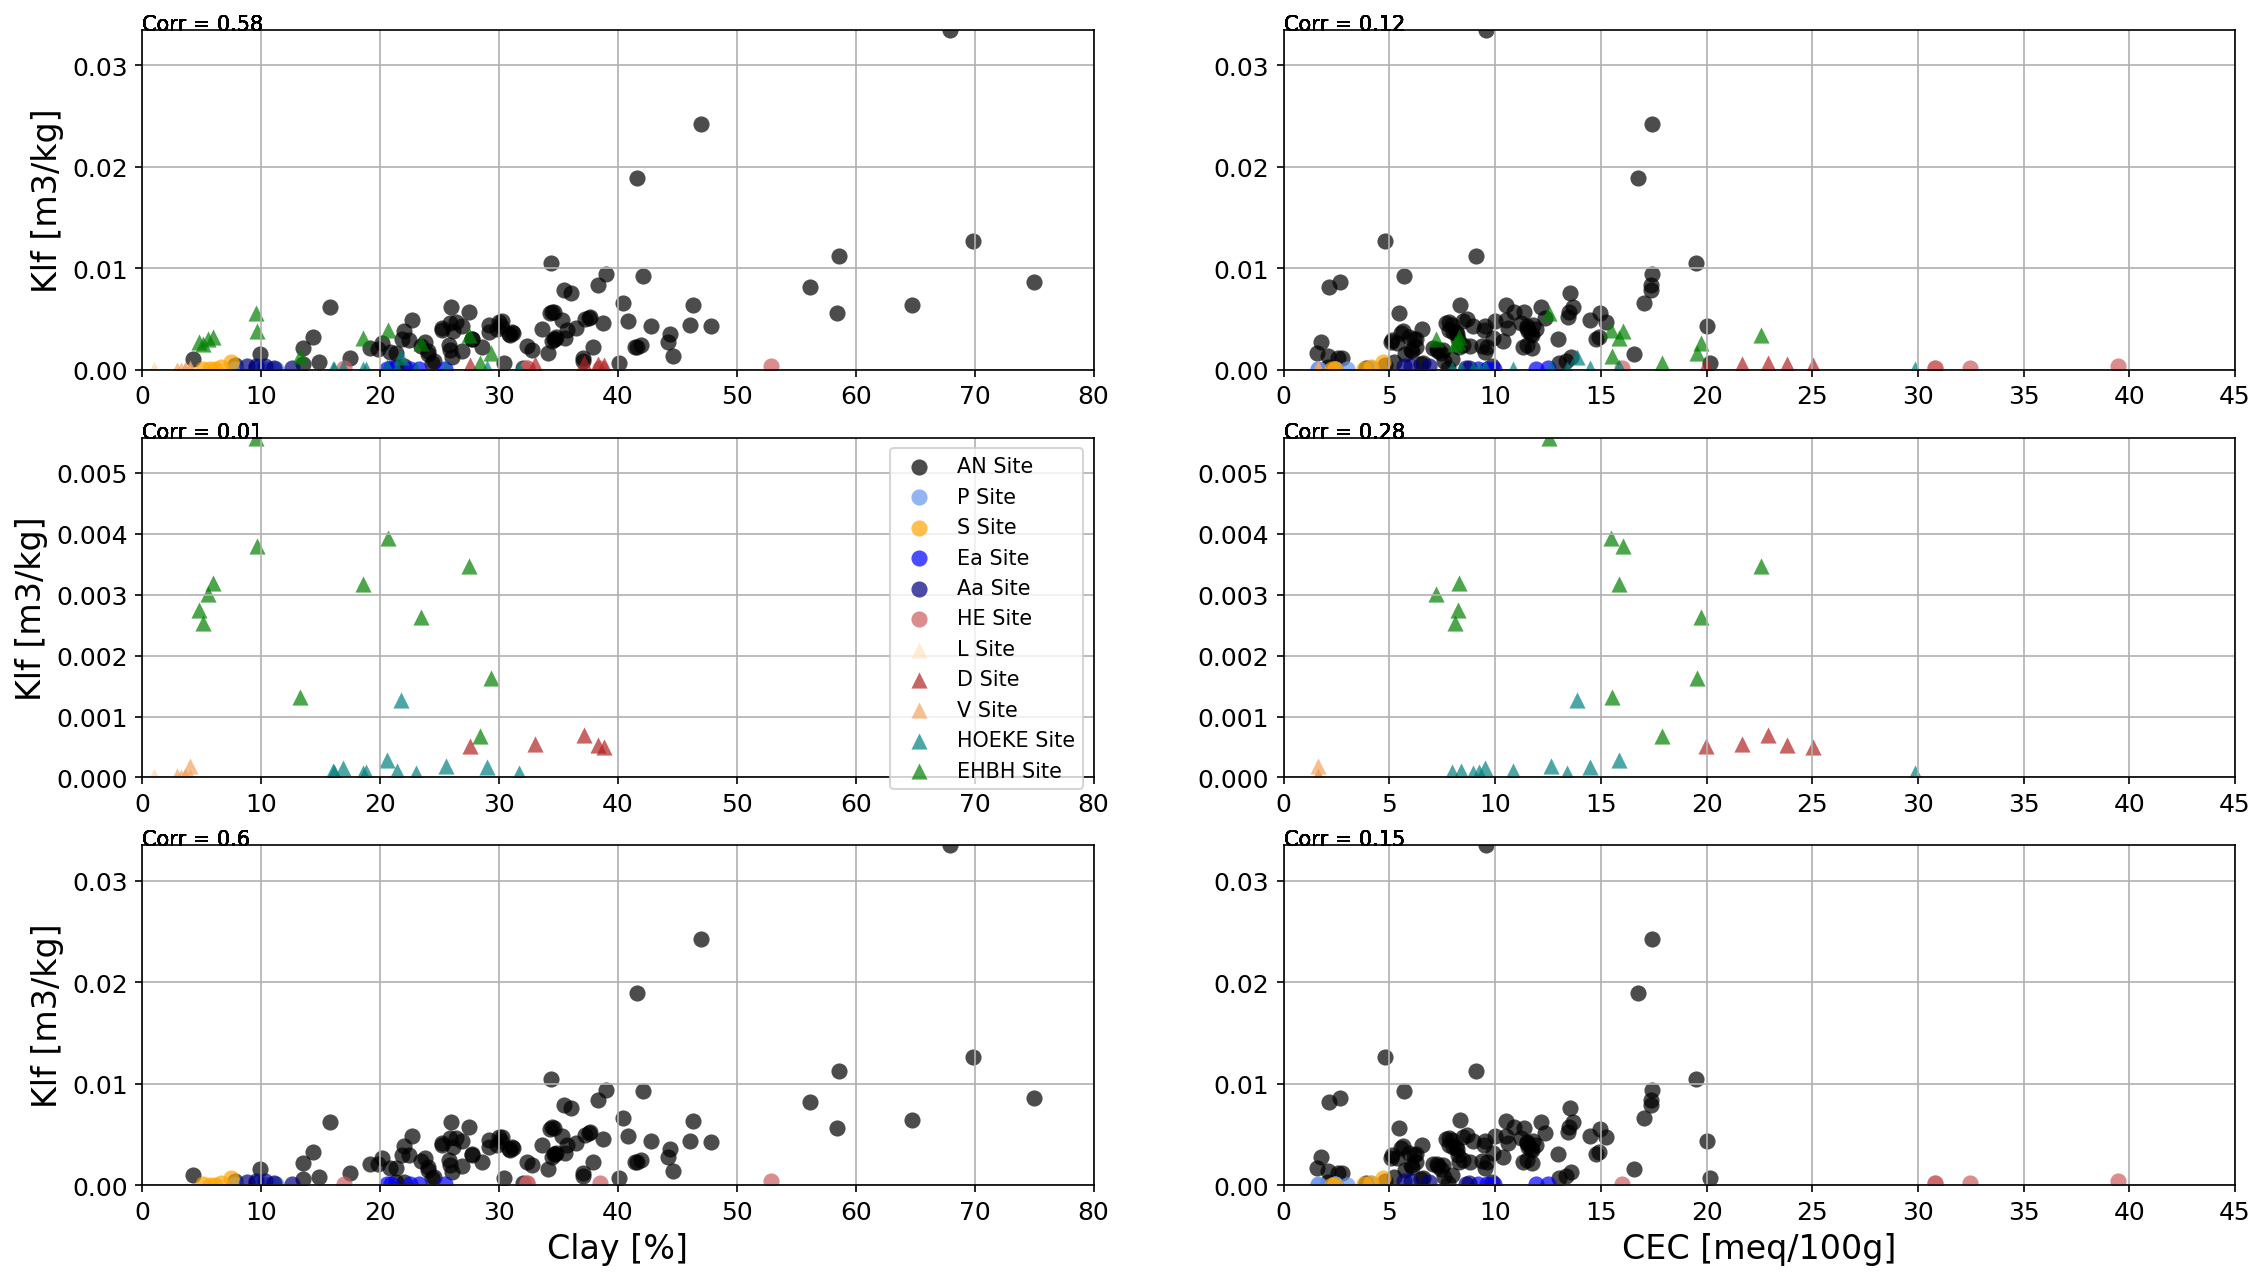

In [24]:
fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 10))

# Using the plot function instead of multiple individual plot calls.
plot_data(ax1, df['Clay'], df['Klf_IP'])
plot_data(ax2, df.CEC, df['Klf_IP'])
plot_data(ax3, df.Clay[df.Archaeology==1], df.Klf_IP[df.Archaeology==1], include_label=True)
plot_data(ax4, df.CEC[df.Archaeology==1], df.Klf_IP[df.Archaeology==1])
plot_data(ax5, df.Clay[df.Archaeology==0], df.Klf_IP[df.Archaeology==0])
plot_data(ax6, df.CEC[df.Archaeology==0], df.Klf_IP[df.Archaeology==0])

# Example to show labels
ax3.legend(loc='upper right', fontsize = 10)

plots.plot1(ax1, ax2, ax3, ax4, ax5, ax6)
plt.show()

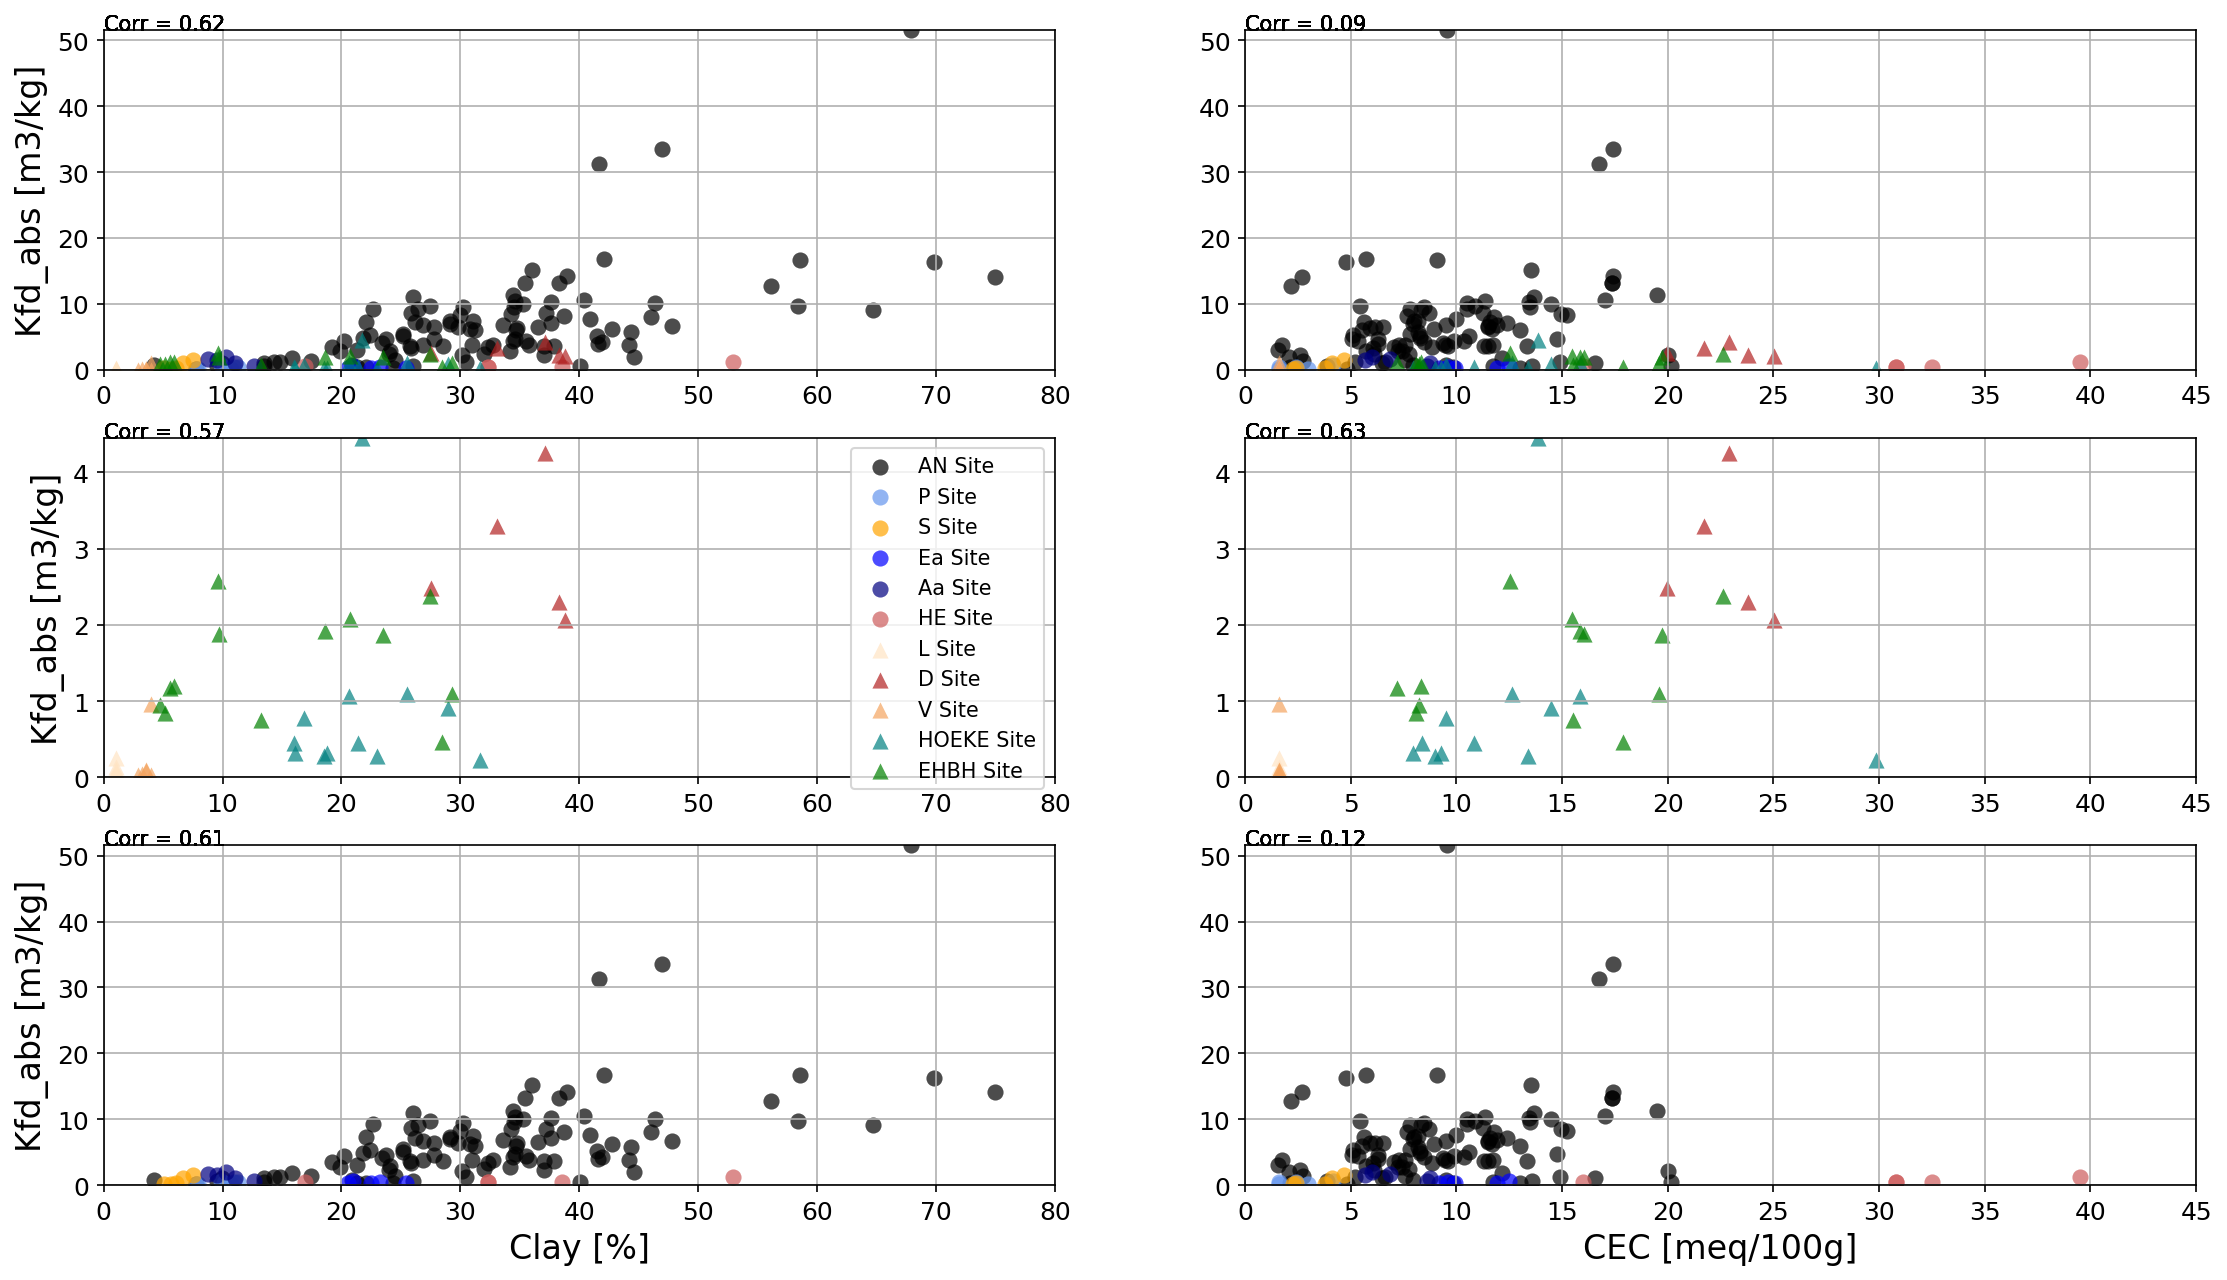

In [25]:
fig2, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 10))

# Using the plot function instead of multiple individual plot calls.
plot_data(ax1, df['Clay'], df['Kfd_abs'])
plot_data(ax2, df.CEC, df['Kfd_abs'])
plot_data(ax3, df.Clay[df.Archaeology==1], df.Kfd_abs[df.Archaeology==1], include_label=True)
plot_data(ax4, df.CEC[df.Archaeology==1], df.Kfd_abs[df.Archaeology==1])
plot_data(ax5, df.Clay[df.Archaeology==0], df.Kfd_abs[df.Archaeology==0])
plot_data(ax6, df.CEC[df.Archaeology==0], df.Kfd_abs[df.Archaeology==0])

# Example to show labels
ax3.legend(loc='upper right', fontsize = 10)

plots.plot2(ax1, ax2, ax3, ax4, ax5, ax6)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


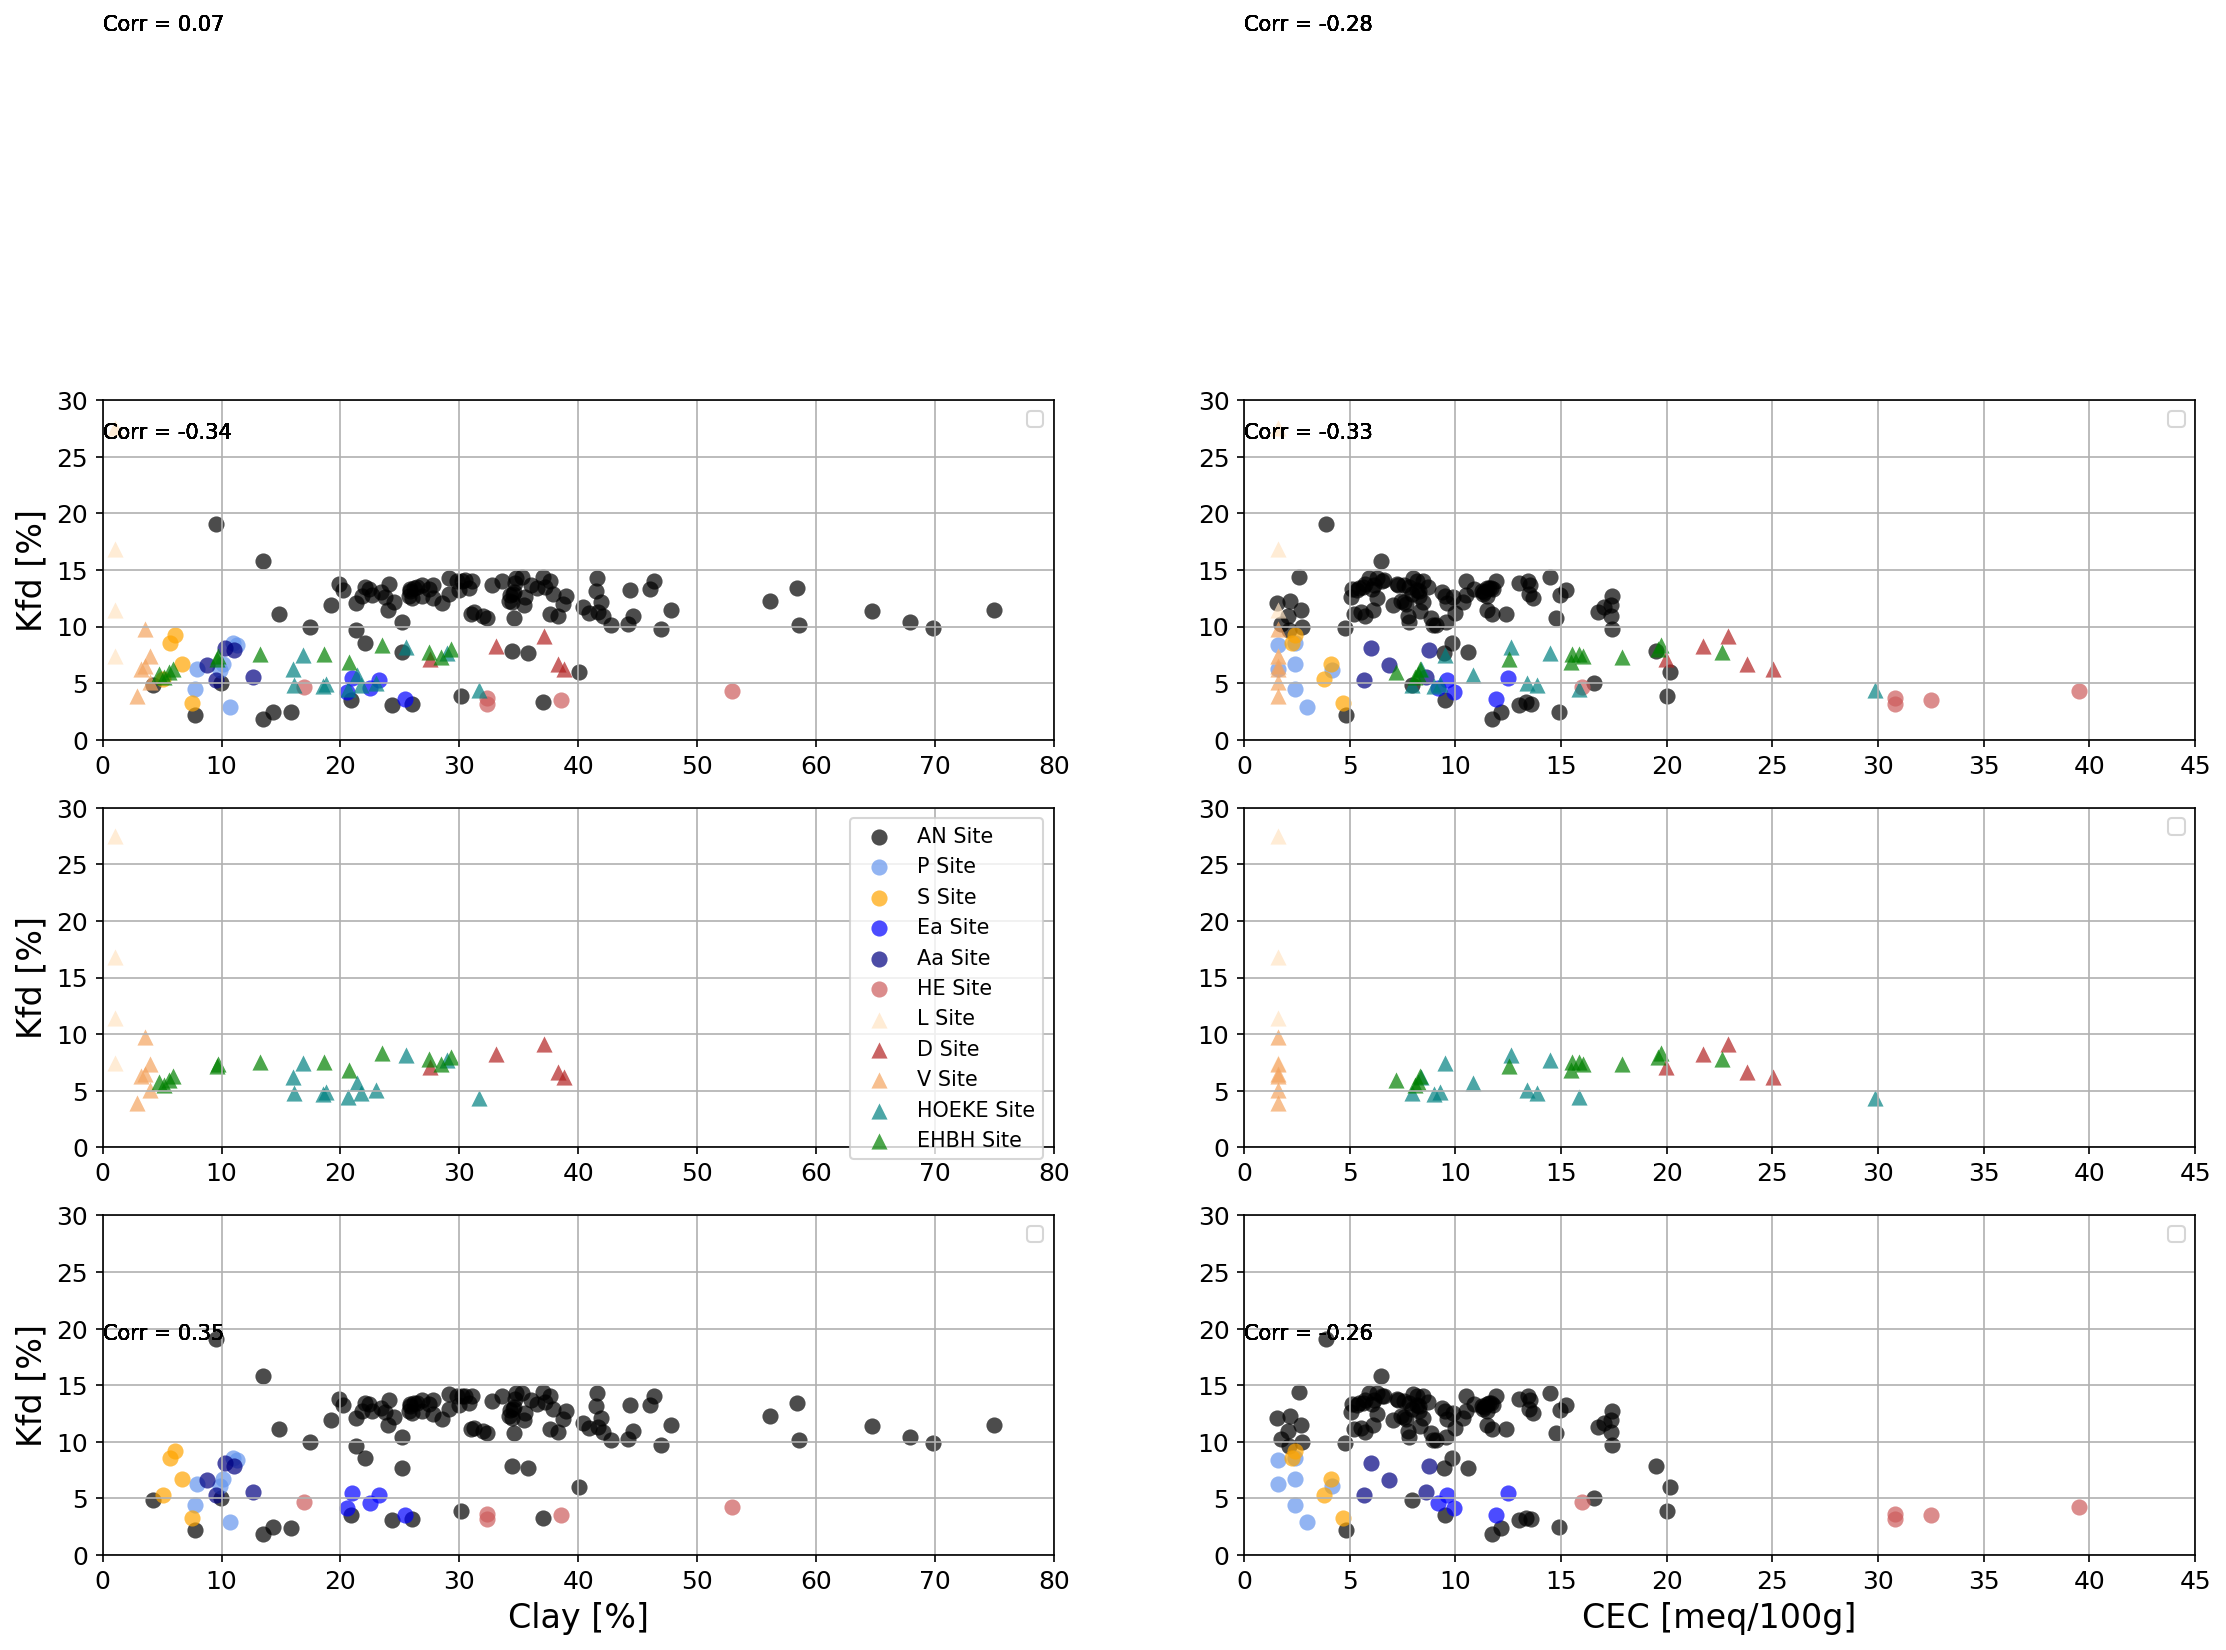

In [26]:
fig3, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 10))

# Using the plot function instead of multiple individual plot calls.
plot_data(ax1, df['Clay'], df['Kfd'])
plot_data(ax2, df.CEC, df['Kfd'])
plot_data(ax3, df.Clay[df.Archaeology==1], df.Kfd[df.Archaeology==1], include_label=True)
plot_data(ax4, df.CEC[df.Archaeology==1], df.Kfd[df.Archaeology==1])
plot_data(ax5, df.Clay[df.Archaeology==0], df.Kfd[df.Archaeology==0])
plot_data(ax6, df.CEC[df.Archaeology==0], df.Kfd[df.Archaeology==0])

# Example to show labels
ax3.legend(loc='upper right', fontsize = 10)

plots.plot3(ax1, ax2, ax3, ax4, ax5, ax6)
plt.show()

## Modelling CEC vs F1mass


In [27]:
results_r2 = pd.DataFrame(columns=['Clay_Klf_IP', 'Clay_Kfd'])
results_rmse = pd.DataFrame(columns=['Clay_Klf_IP', 'Clay_Kfd'])

6.193209132174933
0.12347213758978981
coefficients of equation of plane, (a1, a2):  [0.16]
value of intercept, c: 5.969501639313239
6.1546629578468055
0.13434910025670566
coefficients of equation of plane, (a1, a2):  [ 1.92e-01 -2.10e+02]
value of intercept, c: 5.725606938633471
6.1546629578468055
0.13434910025670566
coefficients of equation of plane, (a1, a2):  [ 1.92e-01 -2.10e+02]
value of intercept, c: 5.725606938633471
6.182123803304557
0.12660715320427618
coefficients of equation of plane, (a1, a2):  [ 0.18 -0.01]
value of intercept, c: 5.844225801157219
6.104027948473133
0.1485340964685441
coefficients of equation of plane, (a1, a2):  [ 0.22 -0.22]
value of intercept, c: 5.472893720784714


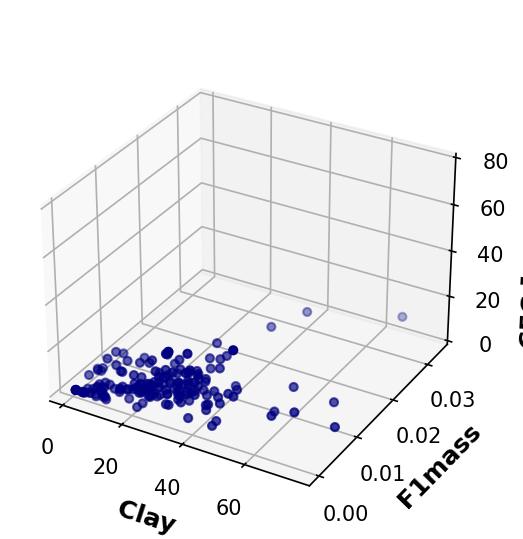

In [28]:
fig = plt.figure()
axa =  fig.add_subplot(projection = "3d")
ThreeD1(axa, plt)

s_array_2 = df[['Clay', 'Klf_IP']].to_numpy()
s_array_1 = df[['Clay']].to_numpy()
s_array_4 = df[['Clay', 'Xhf_IP']].to_numpy()
s_array_3 = df[['Clay', 'Klf_IP']].to_numpy()
s_array_5 = df[['Clay', 'Kfd_abs']].to_numpy()

reg = LinearRegression().fit(s_array_1, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_1) - df.CEC)**2)))
print(reg.score(s_array_1, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)

reg = LinearRegression().fit(s_array_2, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_2) - df.CEC)**2)))
print(reg.score(s_array_2, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)

reg = LinearRegression().fit(s_array_3, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_3) - df.CEC)**2)))
print(reg.score(s_array_3, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)

reg = LinearRegression().fit(s_array_4, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_4) - df.CEC)**2)))
print(reg.score(s_array_4, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)


reg = LinearRegression().fit(s_array_5, df.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_5) - df.CEC)**2)))
print(reg.score(s_array_5, df.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)


cec = np.linspace(0, 80, 80)
clay_ = np.linspace(0, 60, 100)
Klf_IP_ = np.linspace(0, 20, 36000)


#cec_banin_amiel = ptf.Banin_Amiel3(X, Y)
#print(cec_banin_amiel)

#cec_IOPped = ptf.IOPped(X, Y)
#print(cec_IOPped)

axa.scatter(df.Clay, df.Klf_IP, df.CEC,  c = "navy", s = 15)
#axa.plot_surface(X, Y, cec_banin_amiel)
#axa.plot_surface(X, Y, cec_IOPped)

In [29]:
df['Clay_Klf_IP'] = df.Clay*df.Klf_IP
df['Clay_Klf_IP2'] = df.Clay*df.Klf_IP**2
df['Clay2_Klf_IP'] = (df.Clay**2)*df.Klf_IP
df['Clay2'] = df.Clay**2
df['Klf_IP'] = df.Klf_IP**2

#X = df[['Clay', 'Klf_IP', 'Clay_Klf_IP', 'Clay_Klf_IP2', 'Clay2_Klf_IP', 'Clay2', 'Klf_IP2']].values
X = df[['Clay', 'Klf_IP']].values

Y = df.CEC.values

RMSE_train_lin, RMSE_test_lin, R2_train_lin, R2_test_lin = [], [], [], []
for i in range(1000):
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=i)
    
    LinReg = LinearRegression() # call an instance of the class LinearRegression

    LinReg.fit(X_train, y_train) # fit the model on the training data
    y_hat_train = LinReg.predict(X_train) # predict training data
    RMSE_train = RMSE(y_train, y_hat_train) # Compute training set RMSE
    RMSE_train_lin.append(RMSE_train)
    
    y_hat_test = LinReg.predict(X_test) # predict test data
    RMSE_test = RMSE(y_test, y_hat_test) # Test set RMSE
    RMSE_test_lin.append(RMSE_test)
    
    R_train = LinReg.score(X_train, y_train) # Training set R²
    R_test = LinReg.score(X_test, y_test) # Test set R²
    R2_train_lin.append(R_train)
    R2_test_lin.append(R_test)
    
#    print('Training set RMSE: {}'.format(RMSE_train))
#    print('Test set RMSE: {}'.format(RMSE_test))
#    print('Train set R²: {}'.format(R_train))
#    print('Test set R²: {}'.format(R_test))
print(np.mean(R2_test_lin), np.mean(R2_train_lin)) 

0.0008167930969836225 0.13092419373138978


In [30]:

def train_model_and_evaluate(features, target, runs, rmse_func):
    test_errors = []
    train_errors = []
    
    for _ in range(runs):
        r_train_lin, r_test_lin = [], []
        
        x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)
        
        lin_reg = LinearRegression()
        lin_reg.fit(x_train, y_train)
        
        y_hat_train = lin_reg.predict(x_train)
        rmse_train = rmse_func(y_train, y_hat_train)
        
        y_hat_test = lin_reg.predict(x_test)
        rmse_test = rmse_func(y_test, y_hat_test)
        
        r_train_lin.append(lin_reg.score(x_train, y_train))
        r_test_lin.append(lin_reg.score(x_test, y_test))
        
        test_errors.append(np.mean(r_test_lin))
        train_errors.append(np.mean(r_train_lin))
    
    return test_errors, train_errors


# Assuming df and func.RMSE() are defined elsewhere in your code.
x = df[['Clay']].values
y = df['Klf_IP'].values
runs = 1000  # or any other desired number of runs

feature_sets = [
    ['Clay'],
    ['Clay', 'Humus'],
    ['Clay', 'pH_eau'],
    ['Clay', 'CEC'],
    ['CEC', 'pH_eau', 'Carbone', 'Clay', 'Sand', 'Humus']
]

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets:
    x = df[feature_set].values
    
    test_errors, train_errors = train_model_and_evaluate(x, y, runs, func.RMSE)
    
    test_errors_summary.append(np.mean(test_errors))
    train_errors_summary.append(np.mean(train_errors))

print('Errors for feature sets:', test_errors_summary)

# [0.7682385669171589, 0.8049769679677737, 0.764180398556719, 0.8167862190868573, 0.813522773043662]
# [0.8078190849791886, 0.8402467164297608, 0.8006912253127838, 0.7952478094245723, 0.6931044773152953]
# [0.7930888633183476, 0.8310422638065256, 0.7867607689293337, 0.7505139952391313, 0.6276777498099569]
# 1000 [0.796, 0.834, 0.791, 0.787, 0.729]
# 1000 [0.796, 0.834, 0.791, 0.744, 0.624]


Errors for feature sets: [0.09471066227809163, 0.1326911877607373, 0.10247005832447331, 0.068688739637786, 0.1160818269523713]


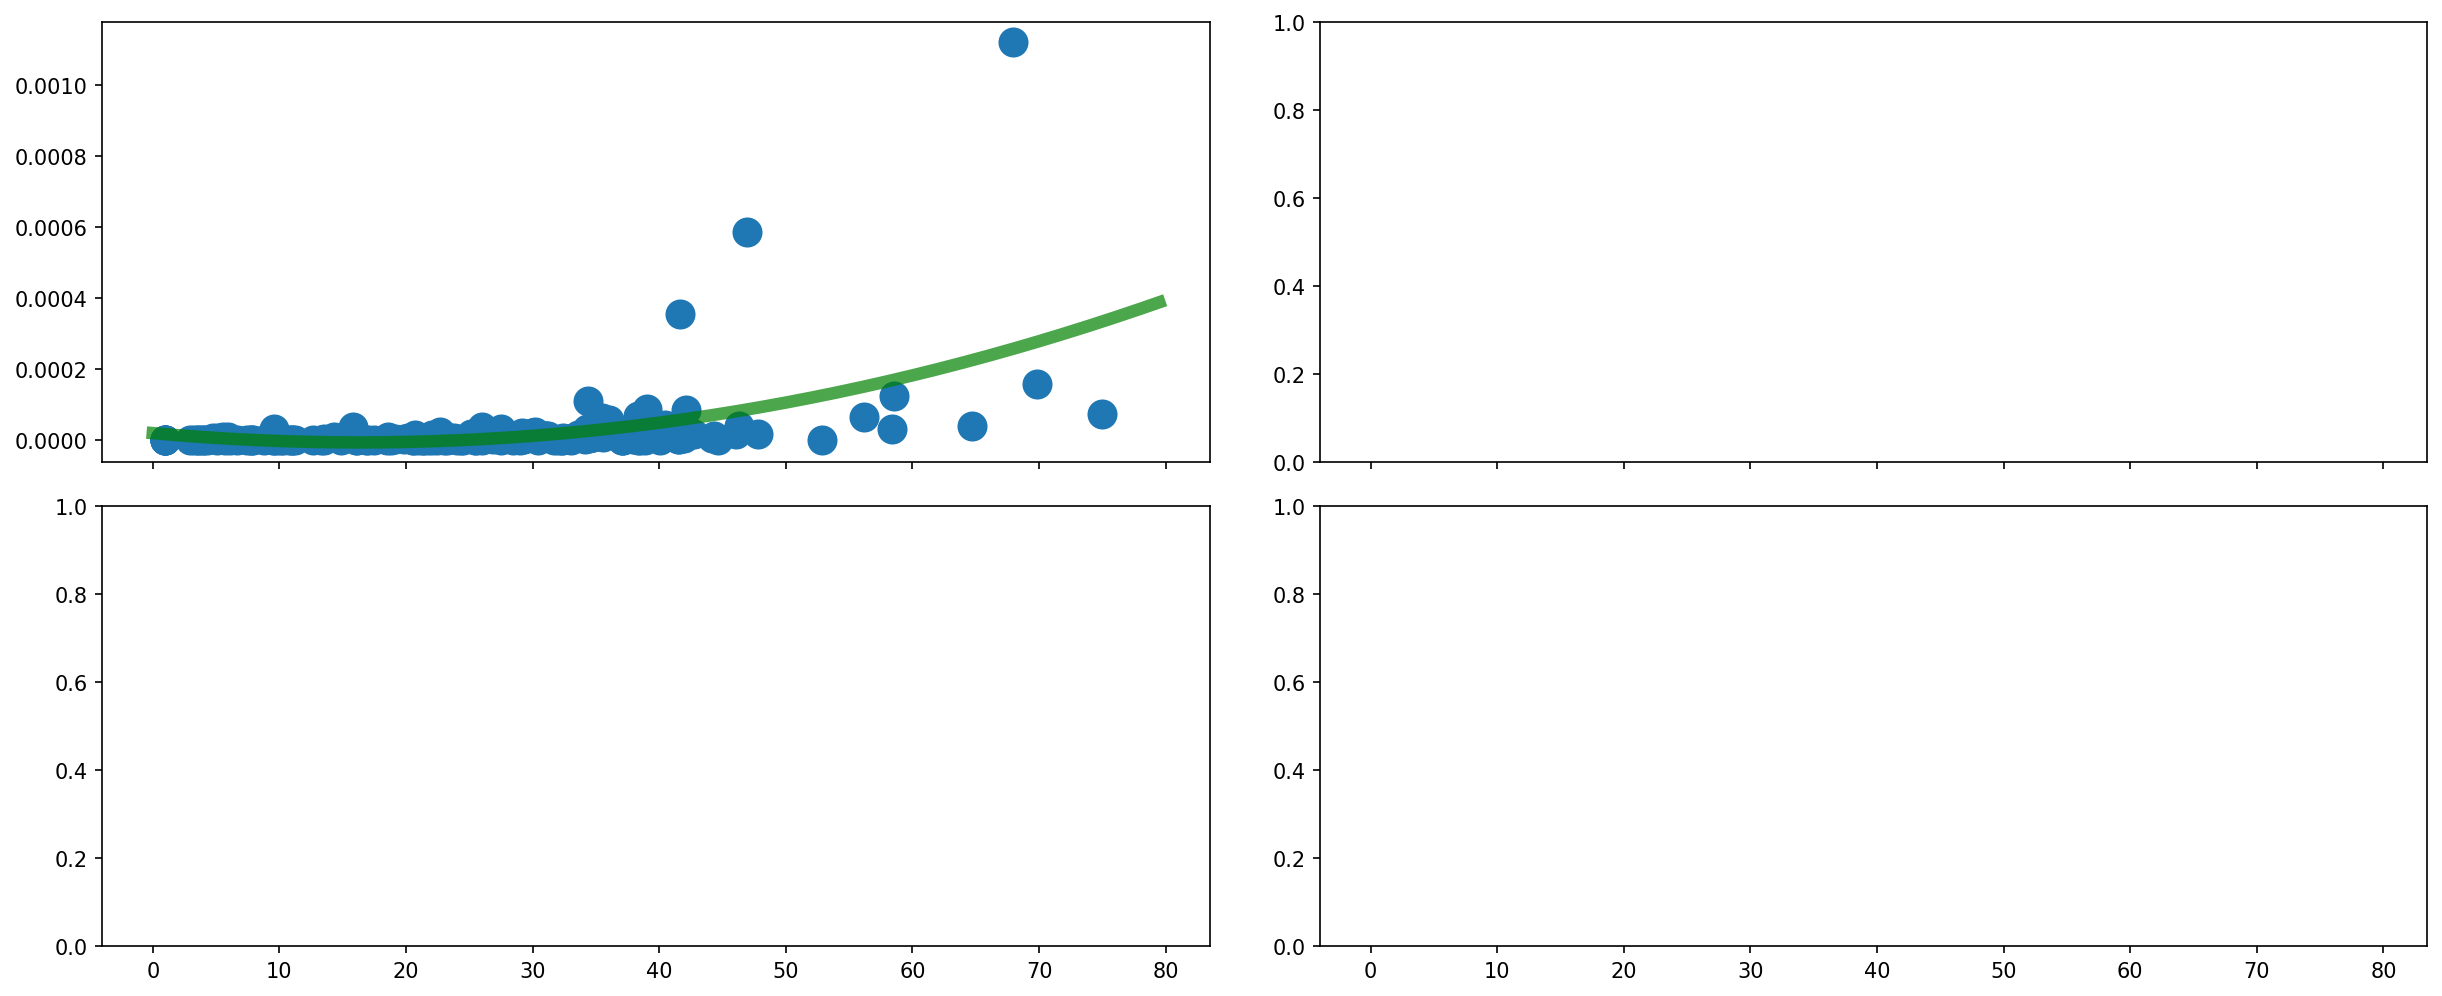

In [31]:
# Plot settings
fig10, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(20, 8))
fig10.subplots_adjust(hspace=0.1)
fig10.subplots_adjust(wspace=0.1)
lw = 6
a = 0.7
ss = 180
ms = 12
yl=1.5
cc_ = np.arange(0, 80, 0.5)
cec_ = np.arange(0.1, 35, 0.5)

########################### Calculating epirical pedotransfer functions #####################################

fit2_clay_Klf = np.polyfit(np.array(df.Clay[:], dtype=float), np.array(df.Klf_IP[:], dtype=float), 2)
pred2_clay_Klf = fit2_clay_Klf[-1] + fit2_clay_Klf[-2]*cc_ + fit2_clay_Klf[-3]*cc_*cc_
pred2r2_clay_Klf =       r2_score(df.Klf_IP[:], fit2_clay_Klf[-1] + fit2_clay_Klf[-2]*df.Clay[:] + fit2_clay_Klf[-3]*df.Clay[:]*df.Clay[:])

#fit_cec_alpha_lg = np.polyfit(np.log(np.array(ds.CEC[:]).astype(float)), np.array(ds.Alpha[:], dtype=float), 1)
#print("logarithmic coefficients for CEC vs alpha =", fit_cec_alpha_lg)
#predlg_cec_alpha =     fit_cec_alpha_lg[-1] + fit_cec_alpha_lg[-2]*np.log(cec_)
#r2_cec_alpha_lg =       r2_score(ds.Alpha[:], fit_cec_alpha_lg[-1] + fit_cec_alpha_lg[-2]*np.log(np.array(ds.CEC[:]).astype(float)))


########################### Plotting data and empirical pedotransfer functions #####################################

colors = ['navy', 'firebrick', 'wheat', 'indianred', 'darkorange', 'blue', 'violet', 'cornflowerblue', 'sandybrown','sandybrown']

ax1.plot(   cc_,                 pred2_clay_Klf, c='g',  linewidth=lw,   alpha=a, label='square model, ${R^2}=$  '+str("{:.2f}".format(pred2r2_clay_Klf)))
ax1.scatter(df.Clay[:], df.Klf_IP[:], s=ss)

#ax2.plot(   cec_,                 predlg_cec_alpha, c='r', alpha=a,  linewidth=lw,   label='Eq. 30, ${R^2}=$  '+str("{:.2f}".format(r2_cec_alpha_lg)))
#ax2.scatter(ds.CEC[:], ds.Alpha[:],  c=colors,    s=ss)

#ax3.plot(   cc_,                 pred2_clay_m, c='g',  alpha=a,  linewidth=lw,  label='square model, ${R^2}=$  '+str("{:.2f}".format(pred2r2_clay_m)))
#ax3.scatter(ds.Clay[:], ds.m_linde[:], c=colors, s=ss)

#ax4.plot(   cec_,                 predlg_cec_m, c='r', alpha=a,  linewidth=lw,   label='Eq. 31, ${R^2}=$  '+str("{:.2f}".format(r2_cec_m_lg)))
#ax4.scatter(ds.CEC[:], ds.m_linde[:],  c=colors,  s=ss)

#plots.fig10(ax1, ax2, ax3, ax4)
#plt.savefig("fig10", dpi=400)

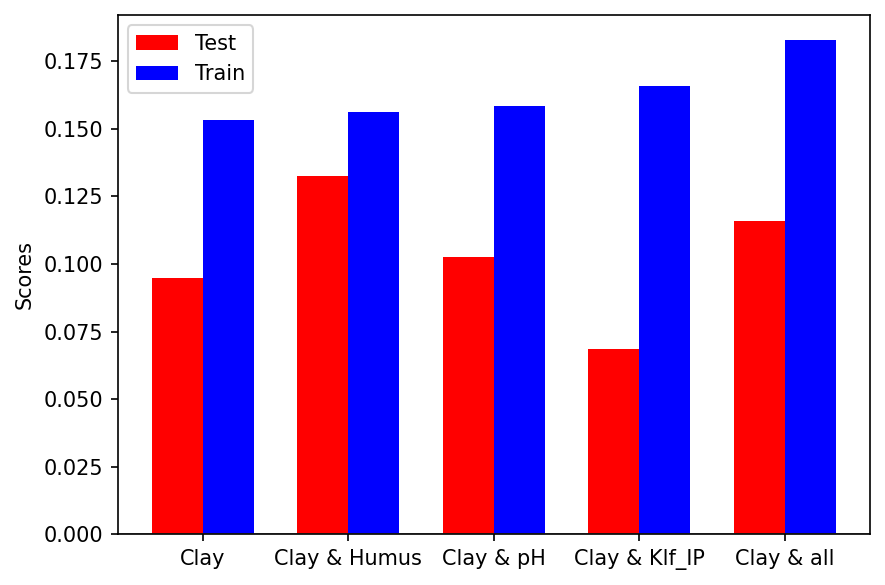

<Figure size 900x600 with 0 Axes>

In [32]:
np.set_printoptions(precision=2)

x_labels = ['Clay', 'Clay & Humus', 'Clay & pH', 'Clay & Klf_IP', 'Clay & all']

fig, ax = plt.subplots()
width = 0.35  # the width of the bars

x = np.arange(len(x_labels))
rects1 = ax.bar(x - width/2, test_errors_summary, width, color = 'red', label='Test')
rects2 = ax.bar(x + width/2, train_errors_summary, width, color = 'blue', label='Train')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_xticks(range(len(test_errors_summary)), x_labels)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
ax.legend()
fig.tight_layout()

plt.show()
plt.savefig("results_cec", dpi=200)

In [33]:
df['Clay_Klf_IP'] = df.Clay*df.Klf_IP
df['Clay_Klf_IP2'] = df.Clay*df.Klf_IP**2
df['Clay2_Klf_IP'] = (df.Clay**2)*df.Klf_IP
df['Clay2'] = df.Clay**2
df['Klf_IP'] = df.Klf_IP**2

#X = df[['Clay', 'Klf_IP', 'Clay_Klf_IP', 'Clay_Klf_IP2', 'Clay2_Klf_IP', 'Clay2', 'Klf_IP2']].values
X = df[['Clay', 'Khf_IP']].values

Y = df.CEC.values

RMSE_train_lin, RMSE_test_lin, R2_train_lin, R2_test_lin = [], [], [], []
for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=i)
    
    LinReg = LinearRegression() # call an instance of the class LinearRegression

    LinReg.fit(X_train, y_train) # fit the model on the training data
    y_hat_train = LinReg.predict(X_train) # predict training data
    RMSE_train = RMSE(y_train, y_hat_train) # Compute training set RMSE
    RMSE_train_lin.append(RMSE_train)
    
    y_hat_test = LinReg.predict(X_test) # predict test data
    RMSE_test = RMSE(y_test, y_hat_test) # Test set RMSE
    RMSE_test_lin.append(RMSE_test)
    
    R_train = LinReg.score(X_train, y_train) # Training set R²
    R_test = LinReg.score(X_test, y_test) # Test set R²
    R2_train_lin.append(R_train)
    R2_test_lin.append(R_test)
    
    print('Training set RMSE: {}'.format(RMSE_train))
    print('Test set RMSE: {}'.format(RMSE_test))
    print('Train set R²: {}'.format(R_train))
    print('Test set R²: {}'.format(R_test))
print(np.mean(R2_test_lin), np.mean(R2_train_lin))   

#Training set RMSE: 3.022285912923456
#Test set RMSE: 4.017802330728136
#Train set R²: 0.8935174323290371
#Test set R²: 0.7738709519620385
#Training set RMSE: 3.404876396085658
#Test set RMSE: 3.172838452687782
#Train set R²: 0.8791276864909744
#Test set R²: 0.6723798296120083
#Training set RMSE: 3.248941032002272
#Test set RMSE: 3.459610422900905
#Train set R²: 0.8881211736555832
##Test set R²: 0.7690263066413321
#Training set RMSE: 2.8369899280128323
#Test set RMSE: 4.181771620967937
#Train set R²: 0.8860783885531048
#Test set R²: 0.7983812357432767
#Training set RMSE: 3.1827956147228984
#Test set RMSE: 3.5859881613105924
#Train set R²: 0.877983746760921
#Test set R²: 0.8310474277179148
#Training set RMSE: 3.2073424775464416
#Test set RMSE: 3.5872123237748545
#Train set R²: 0.8879155405936033
#Test set R²: 0.7629969597940292
#Training set RMSE: 3.136181309045139
#...
#Test set RMSE: 3.222330941037536
#Train set R²: 0.84567195366127
#Test set R²: 0.8925424955338384
#0.8170026100801969 0.8691467074127178

Training set RMSE: 6.551532932912321
Test set RMSE: 5.488325445589811
Train set R²: 0.124283181667591
Test set R²: 0.024820998169620134
Training set RMSE: 5.296874691052732
Test set RMSE: 8.117096585820876
Train set R²: 0.07665775968163135
Test set R²: 0.11058711728690707
Training set RMSE: 6.2069683797685595
Test set RMSE: 6.20637862286901
Train set R²: 0.1162188364058756
Test set R²: 0.12221405852975564
Training set RMSE: 5.818984433012224
Test set RMSE: 6.931449602582365
Train set R²: 0.15713485950170158
Test set R²: 0.0659440425901272
Training set RMSE: 6.301878954619647
Test set RMSE: 5.8390867412145475
Train set R²: 0.11312017684828612
Test set R²: 0.17522952258522861
Training set RMSE: 5.646764992572182
Test set RMSE: 7.569338914858398
Train set R²: 0.0659607765225051
Test set R²: 0.13260857218502176
Training set RMSE: 6.400525244766641
Test set RMSE: 5.720701239650921
Train set R²: 0.15333219427587097
Test set R²: -0.01952550942745468
Training set RMSE: 6.381211236199944
Test s

3.3683410907095754
0.8756592924696405
coefficients of equation of plane, (a1, a2):  [0.73]
value of intercept, c: -1.708826935406151
3.3676930182936404
0.875707134436085
coefficients of equation of plane, (a1, a2):  [ 7.31e-01 -1.95e+11]
value of intercept, c: -1.7053739962115522
3.368269108361453
0.8756646068010687
coefficients of equation of plane, (a1, a2):  [   0.73 -114.21]
value of intercept, c: -1.7032243041735509
3.3306602583020015
0.8784256719917537
coefficients of equation of plane, (a1, a2):  [0.75 0.06]
value of intercept, c: -2.4258687677614468


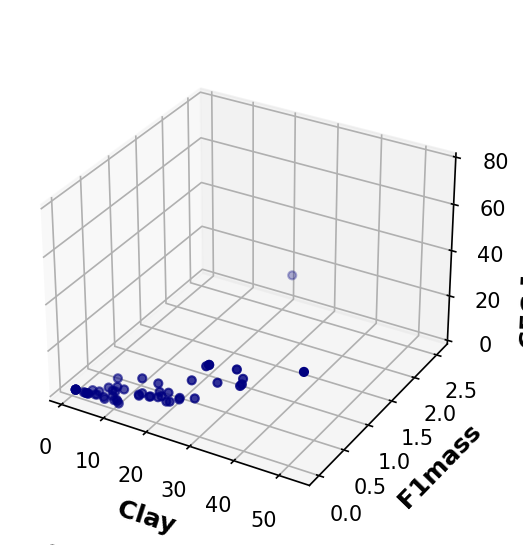

In [34]:
fig = plt.figure()
axa =  fig.add_subplot(projection = "3d")
ThreeD1(axa, plt)

df_fil = df.copy()[:56]
s_array_2 = df_fil[['Clay', 'Klf_IP']].to_numpy()
s_array_1 = df_fil[['Clay']].to_numpy()
s_array_4 = df_fil[['Clay', 'Khf_IP']].to_numpy()
s_array_5 = df_fil[['Clay', 'Kfd']].to_numpy()

reg = LinearRegression().fit(s_array_1, df_fil.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_1) - df_fil.CEC)**2)))
print(reg.score(s_array_1, df_fil.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)

reg = LinearRegression().fit(s_array_2, df_fil.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_2) - df_fil.CEC)**2)))
print(reg.score(s_array_2, df_fil.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)

reg = LinearRegression().fit(s_array_4, df_fil.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_4) - df_fil.CEC)**2)))
print(reg.score(s_array_4, df_fil.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)


reg = LinearRegression().fit(s_array_5, df_fil.CEC)
print( np.sqrt(np.mean((reg.predict(s_array_5) - df_fil.CEC)**2)))
print(reg.score(s_array_5, df_fil.CEC))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)


cec = np.linspace(0, 80, 80)
clay_ = np.linspace(0, 60, 100)
Klf_IP_ = np.linspace(0, 20, 36000)


#cec_banin_amiel = ptf.Banin_Amiel3(X, Y)
#print(cec_banin_amiel)

#cec_IOPped = ptf.IOPped(X, Y)
#print(cec_IOPped)

axa.scatter(df_fil.Clay, df_fil.Klf_IP, df_fil.CEC,  c = "navy", s = 15)
#axa.plot_surface(X, Y, cec_banin_amiel)
#axa.plot_surface(X, Y, cec_IOPped)

# 3.7823879857794247
#0.8244485921101703
#coefficients of equation of plane, (a1, a2):  [0.69951124]
#value of intercept, c: -0.31636207523237303
#3.2909243877488357
#0.8671052042172538
#coefficients of equation of plane, (a1, a2):  [7.03183750e-01 2.09870927e-04]
#value of intercept, c: -1.1995562919773022
#3.245883919970006
#0.8707179783253766
#coefficients of equation of plane, (a1, a2):  [  0.70952958 156.59957818]
#value of intercept, c: -1.35582010337788
#3.2893951887138067
#0.8672286803921219
#coefficients of equation of plane, (a1, a2):  [7.03535789e-01 2.26413155e-04]
#value of intercept, c: -1.2071061393477702
#3.3164995225940426
#0.8650316171822411
#coefficients of equation of plane, (a1, a2):  [0.69872723 0.00283705]
#value of intercept, c: -1.0940549778128847

In [70]:
def stochastic_poly(df, feature_columns, Y, n, choose_n, iters=100, round_n=3):
    ypred_train_best, ypred_test_best, R2_train_t_best, R2_test_t_best, RMSE_train_t_best, RMSE_test_t_best = [], [], [], [], [], []
    X = df[feature_columns]

    if choose_n:
        best_n_ = []

        for i in range(iters):
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
            LinReg = LinearRegression()
            ypred_train_, ypred_test_, R2_train_t_, R2_test_t_, RMSE_train_t_, RMSE_test_t_ = [], [], [], [], [], []

            for k in range(n):
                poly = PolynomialFeatures(degree=k)
                poly.fit(X_train)
                Xt_train = poly.transform(X_train)
                Xt_test = poly.transform(X_test)

                LinReg.fit(Xt_train, y_train)
                ypred_train = LinReg.predict(Xt_train)
                ypred_test = LinReg.predict(Xt_test)

                R2_train_t = r2_score(y_train, ypred_train)
                R2_test_t = r2_score(y_test, ypred_test)

                RMSE_train_t = RMSE(y_train, ypred_train)
                RMSE_test_t = RMSE(y_test, ypred_test)

                ypred_train_.append(ypred_train)
                ypred_test_.append(ypred_test)
                R2_train_t_.append(R2_train_t)
                R2_test_t_.append(R2_test_t)
                RMSE_train_t_.append(RMSE_train_t)
                RMSE_test_t_.append(RMSE_test_t)

            best_n = R2_test_t_.index(max(R2_test_t_))
            best_n_.append(best_n)

            ypred_train_best.append(ypred_train_[best_n])
            ypred_test_best.append(ypred_test_[best_n])
            R2_train_t_best.append(R2_train_t_[best_n])
            R2_test_t_best.append(R2_test_t_[best_n])
            RMSE_train_t_best.append(RMSE_train_t_[best_n])
            RMSE_test_t_best.append(RMSE_test_t_[best_n])
            
        mode_n = mode(best_n_)
        return mode_n, round(np.mean(R2_test_t_best), round_n), round(np.mean(R2_train_t_best), round_n), round(np.mean(RMSE_test_t_best), round_n), round(np.mean(RMSE_train_t_best), round_n)
                                                                                                                
    if not choose_n:
        ypred_train_, ypred_test_, R2_train_t_, R2_test_t_, RMSE_train_t_, RMSE_test_t_ = [], [], [], [], [], []

        for i in range(iters):
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
            LinReg = LinearRegression()

            poly = PolynomialFeatures(degree=n)
            poly.fit(X_train)
            Xt_train = poly.transform(X_train)
            Xt_test = poly.transform(X_test)

            LinReg.fit(Xt_train, y_train)
            ypred_train = LinReg.predict(Xt_train)
            ypred_test = LinReg.predict(Xt_test)

            R2_train_t = r2_score(y_train, ypred_train)
            R2_test_t = r2_score(y_test, ypred_test)

            RMSE_train_t = RMSE(y_train, ypred_train)
            RMSE_test_t = RMSE(y_test, ypred_test)

            ypred_train_.append(ypred_train)
            ypred_test_.append(ypred_test)
            R2_train_t_.append(R2_train_t)
            R2_test_t_.append(R2_test_t)
            RMSE_train_t_.append(RMSE_train_t)
            RMSE_test_t_.append(RMSE_test_t)
        
        return round(np.mean(R2_test_t_), round_n), round(np.mean(R2_train_t_), round_n), round(np.mean(RMSE_test_t_), round_n), round(np.mean(RMSE_train_t_), round_n)                                              

In [71]:
target = df['CEC']
features = ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, features, target, n=5, choose_n=True)
print(best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol)

R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, features, target, n=2, choose_n=False)
print(R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol)
#2 0.229 0.249 5.737 5.697
#0.225 0.26 5.752 5.655

2 0.229 0.249 5.737 5.697
0.225 0.26 5.752 5.655


In [81]:
target = df_fil['CEC']
features = ['Clay', 'Kfd']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df_fil, features, target, n=7, choose_n=True)
print(best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol)

R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df_fil, features, target, n=1, choose_n=False)
print(R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol)

#0.483 0.547 4.582 4.37
#0.009 0.582 5.273 4.233

1 0.868 0.903 3.003 2.907
0.833 0.878 3.419 3.324


In [73]:
target = df['CEC']
features = ['Clay', 'Sand']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, features, target, n=5, choose_n=True)
print(best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol)

R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, features, target, n=3, choose_n=False)
print(R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol)

#3 0.58 0.641 4.14 3.911
#0.559 0.652 4.241 3.856

3 0.58 0.641 4.14 3.911
0.559 0.652 4.241 3.856


In [76]:
target = df['Kfd']
features = ['Clay', 'CEC']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, features, target, n=7, choose_n=True)
print(best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol)

R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, features, target, n=1, choose_n=False)
print(R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol)

1 0.185 0.264 5.243 5.106
0.071 0.136 5.639 5.527


In [ ]:
target = df['Kfd']
features = ['Clay', 'CEC']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, features, target, n=7, choose_n=True)
print(best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol)

R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, features, target, n=1, choose_n=False)
print(R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol)